# Least saquare fitting gappy data

In [1]:
import numpy as np
from numpy import pi, cos, sin
from scipy.linalg import inv
import matplotlib.pyplot as plt

## We will work with some fake data

Here we will mimic 2 years of monthly measurements that are composed by a mean, annual cycle and noise:

$$y = 0.6 + 0.2\cos({2\pi/T}) + \sin({2\pi/T}) + noise$$

In [14]:
L = 2*24 # length of the fake timeseries in months
t = np.arange(1, L) # fake time in months
T = 12 # period of the annual cycle in months
y = 0.6 +0.2*cos(2*pi*t/T) +  sin(2*pi*t/T) +  0.2*np.random.randn(len(t)) # mean + annualcycle + noise

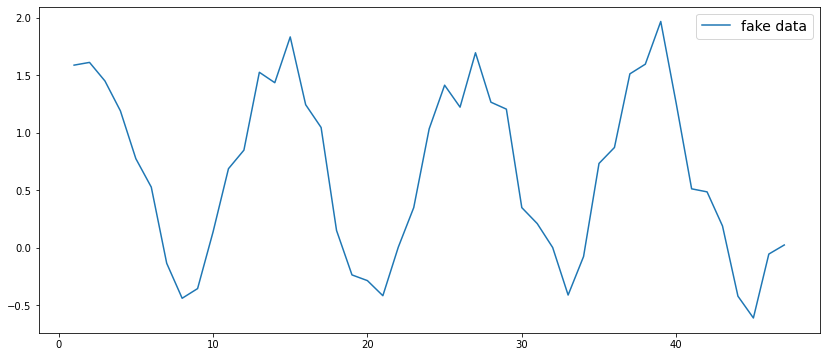

In [48]:
plt.figure(figsize=(14, 6))
plt.plot(t, y, label='fake data')
plt.legend(fontsize=14)

Now, let's do a 3-aprameter fit for the mean, and amplitude of cosine and sine of the annual cycle

In [50]:
A = np.array([ np.ones(len(t)), cos(2*pi*t/T), sin(2*pi*t/T)]).T 
fit = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, y))
print(fit)

[0.65375193 0.28819962 0.95762054]


Now let's plot the fake data and the fit

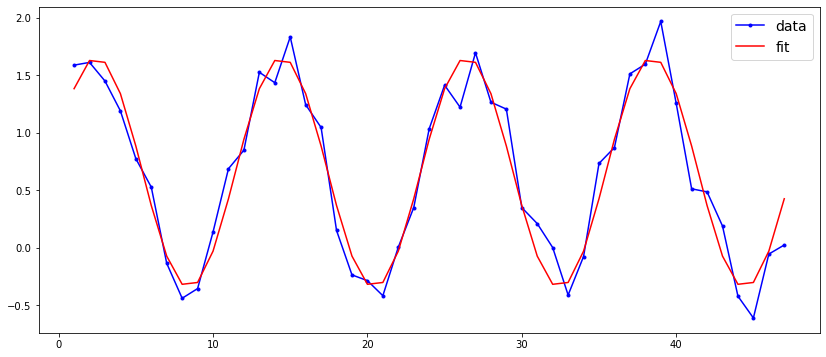

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(t, y, '.-b', label= 'data')
plt.plot(t, fit[0] + fit[1]*cos(2*pi*t/T) + fit[2]*sin(2*pi*t/T), 'r', label= 'fit')
plt.legend(loc=1, fontsize=14)

Now let's add some gapps in the data

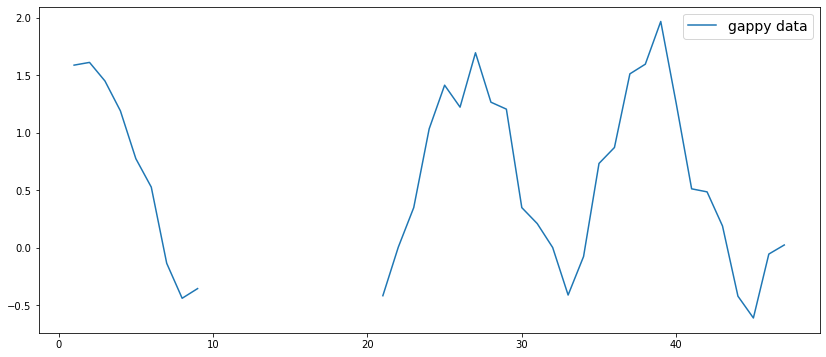

In [52]:
y_gappy = np.ma.masked_where((t>=10) & (t<=20), y)
plt.figure(figsize=(14, 6))
plt.plot(t, y_gappy, label='gappy data')
plt.legend(loc=1, fontsize=14)

In [53]:
y_gappy # y_gappy is a masked array. The mask for invalid measurements is True

masked_array(data=[1.5869387184273418, 1.6107145590004601,
                   1.4489050850906138, 1.1890717173152743,
                   0.7734928275156515, 0.5256950758312049,
                   -0.13705429820691115, -0.44118591686977815,
                   -0.3570072520971526, --, --, --, --, --, --, --, --,
                   --, --, --, -0.4189873181455785, 0.0034608406736892916,
                   0.34761288365415943, 1.0328330272348385,
                   1.4124195742561179, 1.2214212311901627,
                   1.6945896295934255, 1.264480831264719,
                   1.204165385390777, 0.3473370437135727,
                   0.20835071554445703, 9.394898861614376e-05,
                   -0.4131076554096436, -0.07812309579264137,
                   0.7316655053017973, 0.8703782986798442,
                   1.5110614932181476, 1.5952184594986498,
                   1.96686428552522, 1.2546173869293646,
                   0.5108733747545209, 0.4844509165790979,
                   

Now, we will ignore the missing values and extract the values of y_gappy and t only where we have good data.

In [56]:
y_valid = y_gappy[y_gappy.mask==False]
t_valid = t[y_gappy.mask==False]
print(y_valid.shape,t_valid.shape)

(36,) (36,)


In [57]:
A = np.array([ np.ones(len(t_valid)), cos(2*pi*t_valid/T), sin(2*pi*t_valid/T)]).T 
fit_gappy = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, y_gappy.compressed())) #  y_gappy.data gets only the valid values of y_gappy
print(fit_gappy)

[0.64693136 0.25881198 0.96243567]


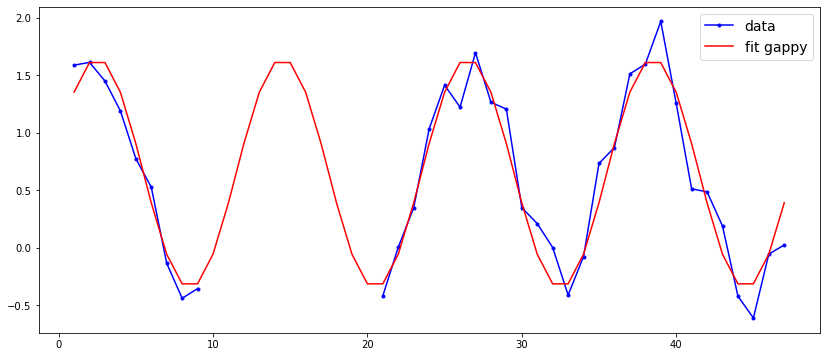

In [58]:
plt.figure(figsize=(14, 6))
plt.plot(t, y_gappy, '.-b', lw=1.5, label= 'data')
plt.plot(t, fit_gappy[0] + fit_gappy[1]*cos(2*pi*t/T) + fit_gappy[2]*sin(2*pi*t/T), 'r', label= 'fit gappy')
plt.legend(loc=1, fontsize=14)

It's still good enough, but there is a limit for that. If you have a lot of gaps, then you might not have information to resolve the annual cycle.

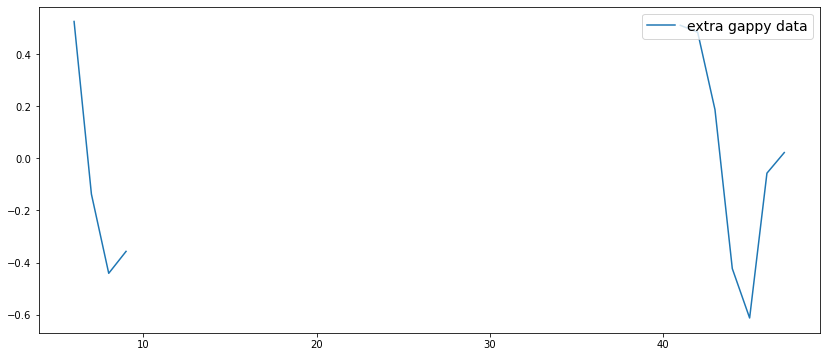

In [75]:
y_gappy = np.ma.masked_where( (t<=5)| ((t>=10) & (t<=40)), y)
plt.figure(figsize=(14, 6))
plt.plot(t, y_gappy, label='extra gappy data')
plt.legend(loc=1, fontsize=14)

In [76]:
y_valid = y_gappy[y_gappy.mask==False]
t_valid = t[y_gappy.mask==False]
A = np.array([ np.ones(len(t_valid)), cos(2*pi*t_valid/T), sin(2*pi*t_valid/T)]).T 
fit_ext_gappy = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, y_gappy.compressed())) #  y_gappy.data gets only the valid values of y_gappy
print(fit_ext_gappy)

[0.39519808 0.04432472 0.79612858]
